In [15]:
## cut and paste from learning/python3/stonks-0.py (without the yfinance dependency) 
import logging
import pickle
import platform
import os
from datetime import datetime

logging.basicConfig(level=logging.INFO,
    # filename="/tmp/app.log", # ideally https://docs.python.org/3/library/logging.handlers.html#logging.handlers.RotatingFileHandler
    format="{asctime} - {levelname} - {message}",
    style="{"
    )

# https://machinelearningmastery.com/a-gentle-introduction-to-serialization-for-python/
# neat thing about stack-overflow coding, is that one discovers interesting areas of the web...
def get_data(st): #get if it doesn't exist - pickle serialization
    if ('Windows' == platform.system()):
        path = 'C:/Users/User/Documents/opendata/ticker/'
    else:
        path = '/home/mike/Documents/opendata/ticker/'
    pickle_filename = path + st + '.pickle'

    if (os.path.isfile(pickle_filename)):
        logging.info('load local ticker cache' + pickle_filename)
        with open(pickle_filename, "rb") as infile:
            ticker_reconstructed = pickle.load(infile)
            return ticker_reconstructed
    else:
        d = yf.Ticker(st)
        # logging.info(d.info)
        hist = d.history(period="6mo") # https://pypi.org/project/yfinance/#quick-start
        # logging.info(type(hist)) # <class 'pandas.core.frame.DataFrame'>

        with open(pickle_filename , "wb") as outfile:
            pickle.dump(hist, outfile)
            logging.info('save to local pickle cache' + pickle_filename)

        return d
    
startTime = datetime.now()

msft = get_data("MSFT")
nvda = get_data("NVDA")
ubsg = get_data("UBS")
sdz  = get_data("BTC-USD") # https://finance.yahoo.com/quote/BTC-USD/
sol  = get_data("SOL-USD") # https://finance.yahoo.com/quote/SOL-USD/
eth  = get_data("ETH")
cad  = get_data("CHFCAD=X")
jpy  = get_data("CHFJPY=X")

jpy = jpy.drop('Stock Splits', axis=1)
jpy = jpy.drop('Dividends', axis=1)
jpy = jpy.drop('Volume', axis=1)

# logging.info(msft)
logging.info(' ->> all done: ' + str(datetime.now() - startTime)) 


2025-12-24 14:24:47,679 - INFO - load local ticker cacheC:/Users/User/Documents/opendata/ticker/MSFT.pickle
2025-12-24 14:24:47,683 - INFO - load local ticker cacheC:/Users/User/Documents/opendata/ticker/NVDA.pickle
2025-12-24 14:24:47,685 - INFO - load local ticker cacheC:/Users/User/Documents/opendata/ticker/UBS.pickle
2025-12-24 14:24:47,688 - INFO - load local ticker cacheC:/Users/User/Documents/opendata/ticker/BTC-USD.pickle
2025-12-24 14:24:47,691 - INFO - load local ticker cacheC:/Users/User/Documents/opendata/ticker/SOL-USD.pickle
2025-12-24 14:24:47,695 - INFO - load local ticker cacheC:/Users/User/Documents/opendata/ticker/ETH.pickle
2025-12-24 14:24:47,697 - INFO - load local ticker cacheC:/Users/User/Documents/opendata/ticker/CHFCAD=X.pickle
2025-12-24 14:24:47,700 - INFO - load local ticker cacheC:/Users/User/Documents/opendata/ticker/CHFJPY=X.pickle
2025-12-24 14:24:47,707 - INFO -  ->> all done: 0:00:00.027841


In [9]:
ubs

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-06-20 00:00:00-04:00,30.760000,30.840000,30.360001,30.420000,4216300,0.0,0.0
2025-06-23 00:00:00-04:00,30.455000,31.075001,30.389999,31.059999,2959300,0.0,0.0
2025-06-24 00:00:00-04:00,31.690001,32.174999,31.620001,32.049999,2324600,0.0,0.0
2025-06-25 00:00:00-04:00,32.169998,32.270000,32.029999,32.250000,2034700,0.0,0.0
2025-06-26 00:00:00-04:00,32.790001,33.130001,32.689999,33.070000,2143500,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-15 00:00:00-05:00,43.160000,43.200001,42.674000,42.689999,1981300,0.0,0.0
2025-12-16 00:00:00-05:00,44.369999,44.945000,44.250000,44.799999,3920800,0.0,0.0
2025-12-17 00:00:00-05:00,45.250000,45.349998,44.825001,44.840000,1940200,0.0,0.0


In [10]:
cad

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-12-01 00:00:00+00:00,1.00800,1.01020,1.000700,1.00450,0,0.0,0.0
2003-12-02 00:00:00+00:00,1.00460,1.00950,1.001700,1.00690,0,0.0,0.0
2003-12-03 00:00:00+00:00,1.00690,1.01190,1.004500,1.01140,0,0.0,0.0
2003-12-04 00:00:00+00:00,1.01110,1.02170,1.006900,1.01760,0,0.0,0.0
2003-12-05 00:00:00+00:00,1.01750,1.02430,1.011200,1.02350,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-15 00:00:00+00:00,1.72910,1.73289,1.725720,1.72908,0,0.0,0.0
2025-12-16 00:00:00+00:00,1.72912,1.73311,1.726703,1.72956,0,0.0,0.0
2025-12-17 00:00:00+00:00,1.72943,1.73564,1.724350,1.72960,0,0.0,0.0


In [12]:
cad.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5741 entries, 2003-12-01 00:00:00+00:00 to 2025-12-19 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5741 non-null   float64
 1   High          5741 non-null   float64
 2   Low           5741 non-null   float64
 3   Close         5741 non-null   float64
 4   Volume        5741 non-null   int64  
 5   Dividends     5741 non-null   float64
 6   Stock Splits  5741 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 358.8 KB


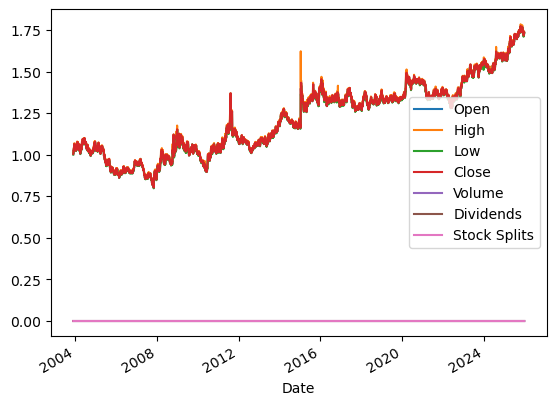

In [5]:
# ask Claude: whats the easiest way to create a graph from a python DataFrame that has a DatetimeIndex called "date" ?
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df with a DatetimeIndex
cad.plot()
plt.show()

In [16]:
import plotly.express as px
# px.line(cad)

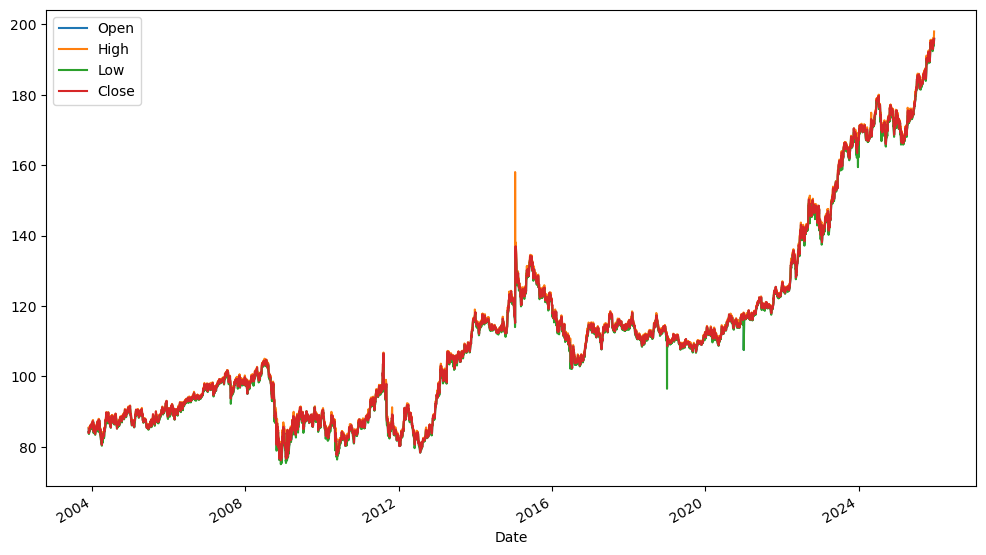

In [16]:
plt.rcParams['figure.figsize'] = [12, 7]
# https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger?noredirect=1&lq=1

jpy.plot()
plt.show()